## NLP Project - Emotion Classification
Kaggle dataset: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp?datasetId=605165

This project utilizes the "Emotions Dataset for NLP" sourced from Kaggle. The dataset is a collection of text entries, each of which is associated with a distinct emotional label. These labels categorize the emotional sentiment expressed in the corresponding text. The purpose of this dataset is to provide a substantial base for training and evaluating Natural Language Processing (NLP) models, specifically in the area of emotion classification. Each sentence is labelled with one of the six basic emotions: **anger, fear, surprise, joy, sadness and love**.



In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Data Preprocessing and Preparation

In our pursuit of effective natural language processing, we undertook several data preprocessing steps to minimize noise and optimize the structure of the data. This process is critical in ensuring that our model, particularly when utilizing word embeddings, produces the most accurate and relevant results possible. Here are the steps that we took:

#### Stop Words Removal

Stop words are words that, while essential for human communication, do not contribute meaningful information to machine learning algorithms. Examples of stop words are 'is', 'at', 'which', 'and', etc. These words are so common in the English language that they can clutter the data and obstruct the learning algorithm from distinguishing meaningful patterns.

We removed these stop words from our data to reduce noise and enhance the model's ability to focus on relevant words. Consequently, this reduces the dimensionality of the data and, in turn, improves computational efficiency.

#### Lemmatization

Lemmatization is the process of reducing words to their base, or root, form. For example, 'running', 'runs', 'ran' are all variations of the word 'run'. By reducing these words to their root form, we can maintain the semantic value of the word while reducing the overall number of unique words in our dataset. 

This process not only helps in decreasing data sparsity but also supports the model in identifying and learning meaningful patterns in the data more efficiently. 

#### Basic Word Preprocessing

Finally, other fundamental word preprocessing techniques were applied, such as converting all text to lower case and removing punctuation and special characters. These steps further standardize the dataset, enabling the model to treat words like 'Hello', 'hello', 'HELLO' as the same, which in reality they are.

This attention to detail in preprocessing provides a cleaner, more uniform dataset that can be more effectively used with word embeddings, enhancing the model's performance.


In [2]:
# Importing Natural Language Toolkit which we use for tokenization, lemmatization and basic data preprocessing.
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess

# NLTK downloads / comment after running for the first time
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


df_train = pd.read_csv('train.txt', header=None, sep = ';')
df_val = pd.read_csv('val.txt', header=None, sep = ';')
df_test = pd.read_csv('test.txt', header=None, sep = ';')


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    words = word_tokenize(text)
    words = simple_preprocess(str(words), deacc=True)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    return words



df_train[0] = df_train[0].apply(preprocess)
df_val[0] = df_val[0].apply(preprocess)
df_test[0] = df_test[0].apply(preprocess)


print(df_train)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grado\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\grado\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grado\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                       0        1
0                              [didnt, feel, humiliated]  sadness
1      [go, feeling, hopeless, damned, hopeful, aroun...  sadness
2      [im, grabbing, minute, post, feel, greedy, wrong]    anger
3      [ever, feeling, nostalgic, fireplace, know, st...     love
4                                     [feeling, grouchy]    anger
...                                                  ...      ...
15995  [brief, time, beanbag, said, anna, feel, like,...  sadness
15996  [turning, feel, pathetic, still, waiting, tabl...  sadness
15997                      [feel, strong, good, overall]      joy
15998              [feel, like, rude, comment, im, glad]    anger
15999                 [know, lot, feel, stupid, portray]  sadness

[16000 rows x 2 columns]


## Data exploration
Plotting the data we discovered there's a great imbalance in the dataset which we predict could affect the performance of our models, we will try over and undersampling techniques to improve this.

Text(0, 0.5, 'Number of instances')

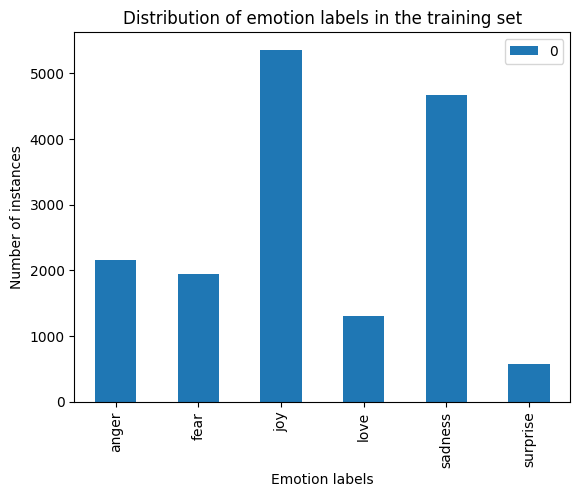

In [3]:
# We utilize a bar plot to explore the distribution of data over different classes
ax = df_train.groupby(1).count().plot.bar()
ax.set_title("Distribution of emotion labels in the training set")
ax.set_xlabel("Emotion labels")
ax.set_ylabel("Number of instances")

## Label encoding
In this section we are converting our textual labels of "fear" , "anger" ... into numerical form where the numerical labels correspond to indices of the printed array.

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(df_train[1])
y_valid = le.transform(df_val[1])
y_test = le.transform(df_test[1])
print(le.classes_)

['anger' 'fear' 'joy' 'love' 'sadness' 'surprise']


## Word vectorization
For our baseline machine learning models we used different word vectorization techniques, which were: TF-IDF, Count matrix and Glove . We will explore the effects of different word vectorization techniques in the upcoming experiments.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer



count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df_train[0].apply(' '.join))

count_train = count_vect.transform(df_train[0].apply(' '.join))
count_val = count_vect.transform(df_val[0].apply(' '.join))
count_test = count_vect.transform(df_test[0].apply(' '.join))


tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')
tfidf_vect.fit(df_train[0].apply(' '.join))

tfidf_train = tfidf_vect.transform(df_train[0].apply(' '.join))
tfidf_val = tfidf_vect.transform(df_val[0].apply(' '.join))
tfidf_test = tfidf_vect.transform(df_test[0].apply(' '.join))


def create_glove_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding='utf8') as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

embedding_dim = 300
all_words = [word for text in df_train[0] for word in text]
word_to_index = {word: index for index, word in enumerate(set(all_words))}

glove_matrix = create_glove_matrix('glove.6B.300d.txt', word_to_index, embedding_dim)




## Baseline Machine Learning Models
In this section we are applying basic ML models to determine a baseline of classification that is easily achievable, we are also exploring the difference between using TF_IDF and Count Matrix vectorizations, we are also applying basic Grid Search hyperparameter optimization to make sure our models are robust.

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

param_grid = {
    'C': [0.1, 0.3, 0.7, 1, 2, 4, 6, 8, 10],
    'solver' : ['liblinear', 'newton-cg', 'lbfgs'],
    'class_weight' : ['balanced', None]
    
}


grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=10000),
                           param_grid=param_grid,
                           cv=5,  
                           scoring='f1_macro',  
                           verbose=1,  
                           n_jobs=-1) 


grid_search.fit(count_train, y_train)
best_params = grid_search.best_params_
print("Best parameters for Count Matrix: ", best_params)


grid_search.fit(tfidf_train, y_train)
best_params = grid_search.best_params_
print("Best parameters for TF-IDF: ", best_params)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for Count Matrix:  {'C': 1, 'class_weight': 'balanced', 'solver': 'liblinear'}
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for TF-IDF:  {'C': 6, 'class_weight': 'balanced', 'solver': 'liblinear'}


In [25]:

LR_count_classifier = LogisticRegression(solver='liblinear',max_iter=10000, class_weight = 'balanced')
LR_count_classifier.fit(count_train, y_train)


LR_tfidf_classifier = LogisticRegression(solver='liblinear',max_iter=10000, class_weight = 'balanced', C = 6)
LR_tfidf_classifier.fit(tfidf_train, y_train)


print("Results of logistic regression on data vectorized with Count Matrix")
print('Training F1 macro:', f1_score(y_train, LR_count_classifier.predict(count_train), average='macro'))
print('Validation F1 macro:', f1_score(y_valid, LR_count_classifier.predict(count_val), average='macro'))
prediction = LR_count_classifier.predict(count_test)
print('Test F1 macro:', f1_score(y_test, LR_count_classifier.predict(count_test), average='macro'))
print(classification_report(y_test, prediction))


print("Results of logistic regression on data vectorized with TF_IDF Vectorization")
print('Training F1 macro:', f1_score(y_train, LR_tfidf_classifier.predict(tfidf_train), average='macro'))
print('Validation F1 macro:', f1_score(y_valid, LR_tfidf_classifier.predict(tfidf_val), average='macro'))
prediction = LR_tfidf_classifier.predict(tfidf_test)
print('Test F1 macro:', f1_score(y_test, LR_tfidf_classifier.predict(tfidf_test), average='macro'))
print(classification_report(y_test, prediction))

Results of logistic regression on data vectorized with Count Matrix
Training F1 macro: 0.9644130667216979
Validation F1 macro: 0.8712026695313413
Test F1 macro: 0.8422747973604164
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       275
           1       0.86      0.85      0.85       224
           2       0.94      0.89      0.92       695
           3       0.71      0.85      0.77       159
           4       0.95      0.92      0.93       581
           5       0.63      0.79      0.70        66

    accuracy                           0.89      2000
   macro avg       0.83      0.86      0.84      2000
weighted avg       0.89      0.89      0.89      2000

Results of logistic regression on data vectorized with TF_IDF Vectorization
Training F1 macro: 0.9734187514454672
Validation F1 macro: 0.8755341203441748
Test F1 macro: 0.8470907906226007
              precision    recall  f1-score   support

           0       0.91      0.77 

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import warnings


warnings.filterwarnings('ignore')



SVM_count_classifier = SVC(kernel='linear',max_iter=10000, class_weight = 'balanced', C = 0.5)
SVM_count_classifier.fit(count_train, y_train)


SVM_tfidf_classifier = SVC(kernel='linear',max_iter=10000, class_weight = 'balanced', C = 1)
SVM_tfidf_classifier.fit(tfidf_train, y_train)


print("Results of SVM on data vectorized with Count Matrix")
print('Training F1 macro:', f1_score(y_train, SVM_count_classifier.predict(count_train), average='macro'))
print('Validation F1 macro:', f1_score(y_valid, SVM_count_classifier.predict(count_val), average='macro'))
prediction = SVM_count_classifier.predict(count_test)
print('Test F1 macro:', f1_score(y_test, SVM_count_classifier.predict(count_test), average='macro'))
print(classification_report(y_test, prediction))


print("Results of SVM on data vectorized with TF_IDF Vectorization")
print('Training F1 macro:', f1_score(y_train, SVM_tfidf_classifier.predict(tfidf_train), average='macro'))
print('Validation F1 macro:', f1_score(y_valid, SVM_tfidf_classifier.predict(tfidf_val), average='macro'))
prediction = SVM_tfidf_classifier.predict(tfidf_test)
print('Test F1 macro:', f1_score(y_test, SVM_tfidf_classifier.predict(tfidf_test), average='macro'))
print(classification_report(y_test, prediction))

Results of SVM on data vectorized with Count Matrix
Training F1 macro: 0.9866496988934409
Validation F1 macro: 0.850135908117914
Test F1 macro: 0.8418535849804712
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       275
           1       0.84      0.87      0.85       224
           2       0.92      0.89      0.90       695
           3       0.71      0.84      0.77       159
           4       0.94      0.89      0.91       581
           5       0.68      0.79      0.73        66

    accuracy                           0.88      2000
   macro avg       0.83      0.86      0.84      2000
weighted avg       0.89      0.88      0.88      2000

Results of SVM on data vectorized with TF_IDF Vectorization
Training F1 macro: 0.9599512772962382
Validation F1 macro: 0.8671068137402943
Test F1 macro: 0.8409496743858802
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       275
           1 

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report
param_grid = {
    'C': [0.5, 1],
    'kernel' : ['linear', 'rbf'],
    'gamma' : [0, 1],
    'class_weight' : ['balanced', None]
    
}


grid_search = GridSearchCV(estimator=SVC(max_iter=5000),
                           param_grid=param_grid,
                           cv=2,  
                           scoring='f1_macro',  
                           verbose=1,  
                           n_jobs=-1) 


grid_search.fit(count_train, y_train)
best_params = grid_search.best_params_
print("Best parameters for Count Matrix: ", best_params)


grid_search.fit(tfidf_train, y_train)
best_params = grid_search.best_params_
print("Best parameters for TF-IDF: ", best_params)


Fitting 2 folds for each of 16 candidates, totalling 32 fits


c:\Users\tincu\miniconda3\envs\tensorflowgpu\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best parameters for Count Matrix:  {'C': 0.5, 'class_weight': 'balanced', 'gamma': 0, 'kernel': 'linear'}
Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best parameters for TF-IDF:  {'C': 1, 'class_weight': 'balanced', 'gamma': 0, 'kernel': 'linear'}


c:\Users\tincu\miniconda3\envs\tensorflowgpu\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [19]:

from sklearn.naive_bayes import MultinomialNB

alphav = 0.1

NB_count_classifier = MultinomialNB(alpha = alphav)
NB_count_classifier.fit(count_train, y_train)


NB_tfidf_classifier = MultinomialNB(alpha = alphav)
NB_tfidf_classifier.fit(tfidf_train, y_train)


print("Results of Naive Bayes on data vectorized with Count Matrix")
print('Training F1 macro:', f1_score(y_train, NB_count_classifier.predict(count_train), average='macro'))
print('Validation F1 macro:', f1_score(y_valid, NB_count_classifier.predict(count_val), average='macro'))
prediction = NB_count_classifier.predict(count_test)
print('Test F1 macro:', f1_score(y_test, NB_count_classifier.predict(count_test), average='macro'))
print(classification_report(y_test, prediction))


print("Results of Naive Bayes on data vectorized with TF_IDF Vectorization")
print('Training F1 macro:', f1_score(y_train, NB_tfidf_classifier.predict(tfidf_train), average='macro'))
print('Validation F1 macro:', f1_score(y_valid, NB_tfidf_classifier.predict(tfidf_val), average='macro'))
prediction = NB_tfidf_classifier.predict(tfidf_test)
print('Test F1 macro:', f1_score(y_test, NB_tfidf_classifier.predict(tfidf_test), average='macro'))
print(classification_report(y_test, prediction))

Results of Naive Bayes on data vectorized with Count Matrix
Training F1 macro: 0.9544540586872429
Validation F1 macro: 0.7293867812913133
Test F1 macro: 0.7270716402449441
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       275
           1       0.74      0.72      0.73       224
           2       0.82      0.89      0.85       695
           3       0.73      0.59      0.65       159
           4       0.83      0.84      0.83       581
           5       0.66      0.47      0.55        66

    accuracy                           0.80      2000
   macro avg       0.76      0.71      0.73      2000
weighted avg       0.79      0.80      0.79      2000

Results of Naive Bayes on data vectorized with TF_IDF Vectorization
Training F1 macro: 0.906258901424703
Validation F1 macro: 0.6630970518964793
Test F1 macro: 0.6226059012173246
              precision    recall  f1-score   support

           0       0.86      0.60      0.71       2

### Performance analysis of baseline ML models with hyperparameter tuning and TF-IDF / Count Matrix Word Vectorizations
#### Overfitting
All 3 models seem to have great discrepancies between their performances on the training, validation and test sets, this indicates that the model isn't generalizing well enough to the testing set. We aim to improve on that by applying neural nets which give us the option of applying higher amounts of dropout and regularization to fix that issue.

#### Vectorization technique
TF-IDF seems to be performing better for Logistic Regression and our Support vector machine although insignificantly, despite that, Count Matrix performs by far better for Naive Bayes.

#### Class imbalance
All models perform much better on classes 2 and 4 with regards to F1 macro due to the staggering class imbalance in all of our sets, class 5, "surprise" has far less samples than the other ones and that is evident in our models' overall performance on it.

#### Model comparison
Both Logistic Regression and the SVM have F1 macro around 84-85 % which is signficantly higher than Naive Bayes' F1 macro of 62% on the test set.


In [6]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,GRU,Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import tensorflow_addons as tfa 
from sklearn.metrics import f1_score, classification_report


tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train[0].apply(' '.join))

X_train_nn = tokenizer.texts_to_sequences(df_train[0].apply(' '.join))
X_valid_nn = tokenizer.texts_to_sequences(df_val[0].apply(' '.join))
X_test_nn = tokenizer.texts_to_sequences(df_test[0].apply(' '.join))


maxlen = max(len(x) for x in X_train_nn)  
X_train_nn = pad_sequences(X_train_nn, maxlen=maxlen)
X_valid_nn = pad_sequences(X_valid_nn, maxlen=maxlen)
X_test_nn = pad_sequences(X_test_nn, maxlen=maxlen)


y_train_onehot = to_categorical(y_train)
y_valid_onehot = to_categorical(y_valid)
y_test_onehot = to_categorical(y_test)
embedding_dim = 300
embedding_matrix = create_glove_matrix('glove.6B.300d.txt',tokenizer.word_index, embedding_dim)

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, weights=[embedding_matrix], input_length=maxlen,trainable=True))
model.add(Bidirectional(GRU(units=128, dropout=0.5, recurrent_dropout=0,return_sequences=False ))) 
model.add(Dense(units=6, activation='softmax')) 


model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics='accuracy')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train_nn, y_train_onehot, validation_data=(X_valid_nn, y_valid_onehot), epochs=4, callbacks=[], batch_size=16, verbose = 1) 


print('Training Accuracy:', model.evaluate(X_train_nn, y_train_onehot)[1])
print('Validation Accuracy:', model.evaluate(X_valid_nn, y_valid_onehot)[1])
print('Test Accuracy:', model.evaluate(X_test_nn, y_test_onehot)[1])

prediction_probs = model.predict(X_test_nn)
prediction_classes = np.argmax(prediction_probs, axis=1)
y_test_classes = np.argmax(y_test_onehot, axis=1)

print(classification_report(y_test_classes, prediction_classes))
print(le.classes_)





c:\Users\grado\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Epoch 1/4
1000/1000 [==============================] - 20s 15ms/step - loss: 0.6522 - accuracy: 0.7654 - val_loss: 0.1626 - val_accuracy: 0.9315
Epoch 2/4
1000/1000 [==============================] - 15s 15ms/step - loss: 0.1625 - accuracy: 0.9316 - val_loss: 0.1221 - val_accuracy: 0.9400
Epoch 3/4
1000/1000 [==============================] - 14s 14ms/step - loss: 0.1094 - accuracy: 0.9503 - val_loss: 0.1293 - val_accuracy: 0.9420
Epoch 4/4
500/500 [==============================] - 3s 5ms/step - loss: 0.0457 - accuracy: 0.9814
Training Accuracy: 0.981374979019165
63/63 [==============================] - 0s 6ms/step - loss: 0.1223 - accuracy: 0.9405
Validation Accuracy: 0.940500020980835
63/63 [==============================] - 0s 6ms/step - loss: 0.1241 - accuracy: 0.9320
Test Accuracy: 0.9319999814033508
63/63 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       275
           1       0

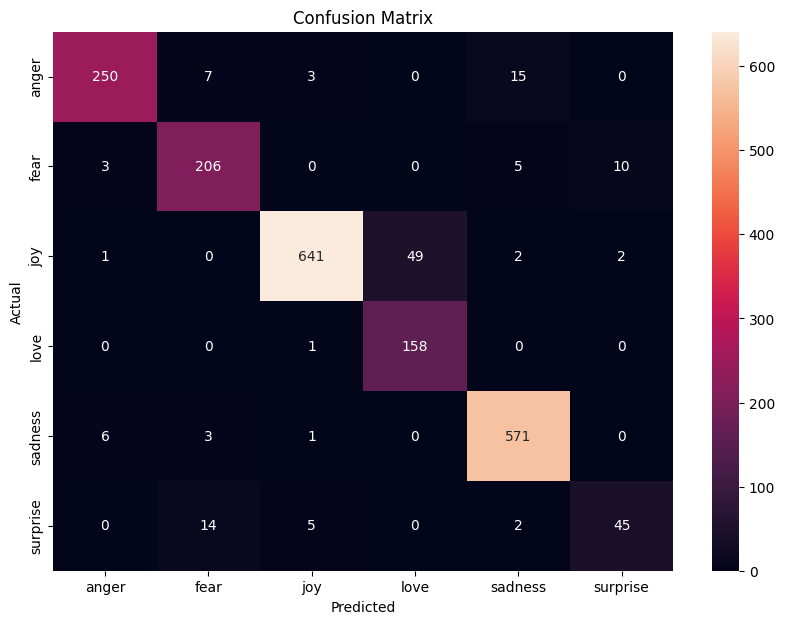

In [33]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test_classes, prediction_classes)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


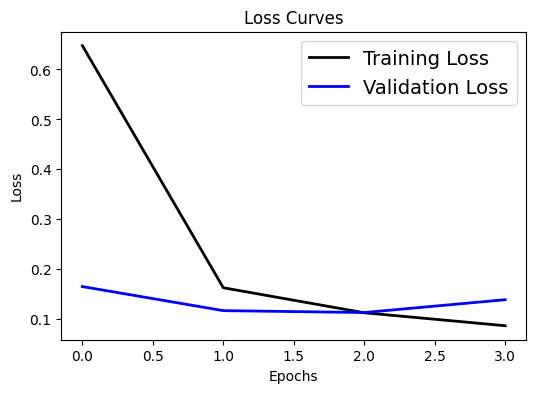

In [34]:

# Plotting the loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)
plt.show()


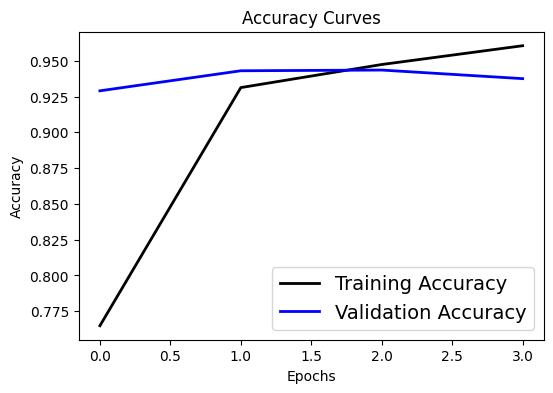

In [35]:

# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)
plt.show()

Epoch 1/4
500/500 [==============================] - 5s 8ms/step - loss: 0.8386 - accuracy: 0.6926 - val_loss: 0.2341 - val_accuracy: 0.9155
Epoch 2/4
500/500 [==============================] - 4s 7ms/step - loss: 0.2200 - accuracy: 0.9262 - val_loss: 0.1915 - val_accuracy: 0.9260
Epoch 3/4
500/500 [==============================] - 4s 7ms/step - loss: 0.1284 - accuracy: 0.9541 - val_loss: 0.1936 - val_accuracy: 0.9295
Epoch 4/4
500/500 [==============================] - 2s 3ms/step - loss: 0.0373 - accuracy: 0.9871
Training Accuracy: 0.9871249794960022
63/63 [==============================] - 0s 3ms/step - loss: 0.2141 - accuracy: 0.9225
Validation Accuracy: 0.9225000143051147
63/63 [==============================] - 0s 3ms/step - loss: 0.2014 - accuracy: 0.9255
Test Accuracy: 0.9254999756813049
63/63 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       275
           1       0.90      0

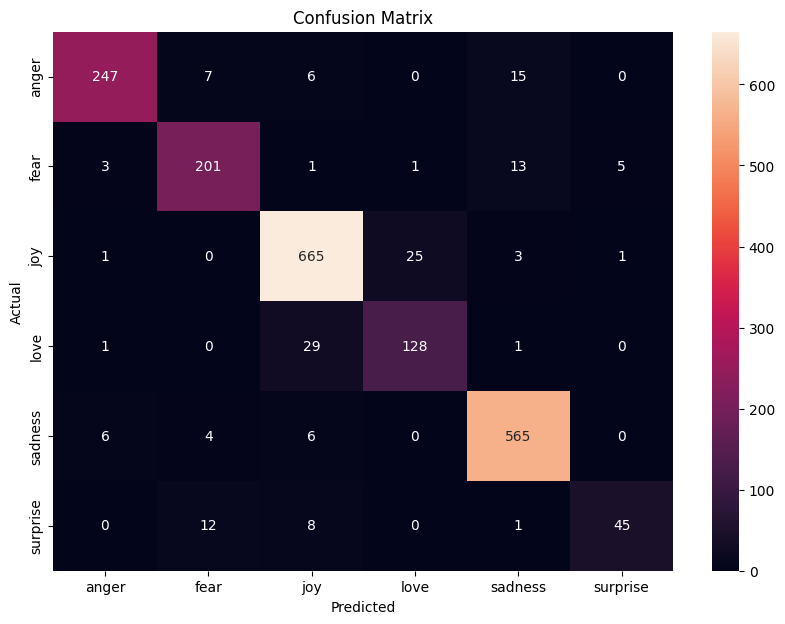

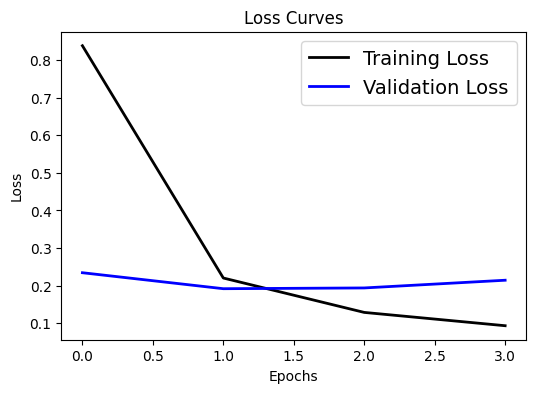

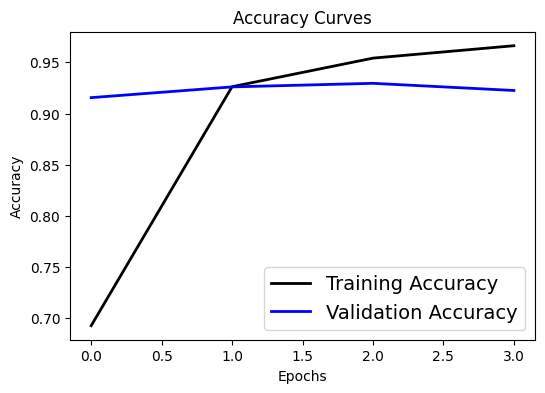

In [30]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,GRU,Bidirectional,GlobalMaxPooling1D,Conv1D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import tensorflow_addons as tfa 


tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train[0].apply(' '.join))

X_train_nn = tokenizer.texts_to_sequences(df_train[0].apply(' '.join))
X_valid_nn = tokenizer.texts_to_sequences(df_val[0].apply(' '.join))
X_test_nn = tokenizer.texts_to_sequences(df_test[0].apply(' '.join))


maxlen = max(len(x) for x in X_train_nn)  
X_train_nn = pad_sequences(X_train_nn, maxlen=maxlen)
X_valid_nn = pad_sequences(X_valid_nn, maxlen=maxlen)
X_test_nn = pad_sequences(X_test_nn, maxlen=maxlen)


y_train_onehot = to_categorical(y_train)
y_valid_onehot = to_categorical(y_valid)
y_test_onehot = to_categorical(y_test)



y_train_labels = np.argmax(y_train_onehot, axis=1)



embedding_dim = 300
embedding_matrix = create_glove_matrix('glove.6B.300d.txt',tokenizer.word_index, embedding_dim)
# CNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, weights=[embedding_matrix], input_length=maxlen,trainable=True)) 
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics='accuracy')

early_stop = EarlyStopping(monitor='val_loss', patience=5)
history2 = model.fit(X_train_nn, y_train_onehot, validation_data=(X_valid_nn, y_valid_onehot), epochs=4, callbacks=[early_stop], batch_size=32, verbose = 1) 


print('Training Accuracy:', model.evaluate(X_train_nn, y_train_onehot)[1])
print('Validation Accuracy:', model.evaluate(X_valid_nn, y_valid_onehot)[1])
print('Test Accuracy:', model.evaluate(X_test_nn, y_test_onehot)[1])

prediction_probs = model.predict(X_test_nn)
prediction_classes = np.argmax(prediction_probs, axis=1)
y_test_classes = np.argmax(y_test_onehot, axis=1)
print(classification_report(y_test_classes, prediction_classes))
print(le.classes_)


conf_mat = confusion_matrix(y_test_classes, prediction_classes)

# Confusion matrix visualization
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plotting the loss curve
plt.figure(figsize=[6,4])
plt.plot(history2.history['loss'], 'black', linewidth=2.0)
plt.plot(history2.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)
plt.show()

# Plotting the accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history2.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history2.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)
plt.show()




### Dataset expansion
Due to the very unbalanced nature of our original dataset, we looked for similar datasets to expand our information and fill the great lack of ie. "surprise" classes. We came upon GoEmotions, a google dataset with very detailed emotion labels which can be aggregated into the basic 6 emotions that our original dataset uses.

GoEmotions dataset: https://ai.googleblog.com/2021/10/goemotions-dataset-for-fine-grained.html



In [6]:



df_train_real = pd.read_csv('train.txt', header=None, sep = ';')
df_train_google = pd.read_csv('trainGoogle.tsv', header=None, sep = '\t')

for i in range(len(df_train_google)):
    splitted = df_train_google[1][i].split(',')
    num = int(splitted[random.randint(0,len(splitted)-1)])
    if(num in [2,3,10]):
        df_train_google[1][i] = 'anger'
    elif(num in [14,19]):
        df_train_google[1][i] = 'fear'
    elif(num in [17]):
        df_train_google[1][i] = 'joy'
    elif(num in [26,22,6,7]):
        df_train_google[1][i] = 'surprise'
    elif(num in [18,5,8]):
        df_train_google[1][i] = 'love'
    elif(num in [25,9,16,12,24]):
        df_train_google[1][i] = 'sadness'
    else:
        df_train_google[1][i] = 'other'
        
df_train_google.drop(2,axis=1,inplace=True)
df_train_google = df_train_google[df_train_google[1] != 'other']
aug_train = pd.concat([df_train_real, df_train_google], ignore_index=True)

aug_train[0] = aug_train[0].apply(preprocess)

print(aug_train)


                                                       0         1
0                              [didnt, feel, humiliated]   sadness
1      [go, feeling, hopeless, damned, hopeful, aroun...   sadness
2      [im, grabbing, minute, post, feel, greedy, wrong]     anger
3      [ever, feeling, nostalgic, fireplace, know, st...      love
4                                     [feeling, grouchy]     anger
...                                                  ...       ...
33164  [name, name, looked, tonight, watching, husky,...  surprise
33165  [added, mate, well, got, bow, love, hunting, a...      love
33166      [always, thought, funny, reference, anything]  surprise
33167  [talking, anything, bad, happened, name, fault...     anger
33168                                      [enjoy, ride]       joy

[33169 rows x 2 columns]


#### Expanded dataset
Graphing the class distribution of the new expanded dataset we can notice the classes still aren't perfectly balanced but it does look much better than the original dataset.

Text(0, 0.5, 'Number of instances')

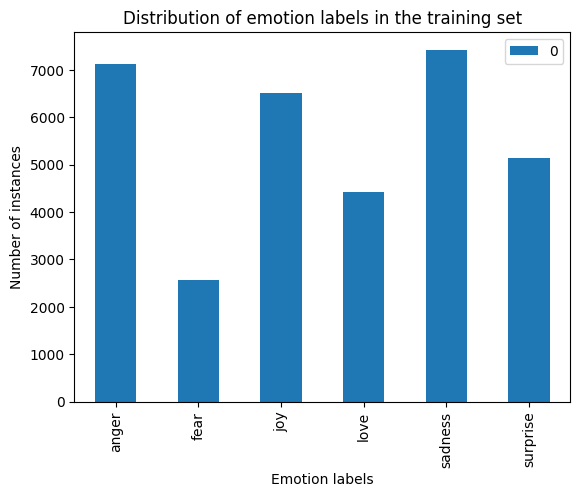

In [7]:
# We utilize a bar plot to explore the distribution of data over different classes
ax = aug_train.groupby(1).count().plot.bar()
ax.set_title("Distribution of emotion labels in the training set")
ax.set_xlabel("Emotion labels")
ax.set_ylabel("Number of instances")

Epoch 1/10
1038/1038 [==============================] - 15s 12ms/step - loss: 1.1459 - accuracy: 0.5611 - val_loss: 0.3236 - val_accuracy: 0.8915
Epoch 2/10
1038/1038 [==============================] - 11s 11ms/step - loss: 0.7010 - accuracy: 0.7422 - val_loss: 0.1754 - val_accuracy: 0.9250
Epoch 3/10
1038/1038 [==============================] - 11s 11ms/step - loss: 0.6099 - accuracy: 0.7728 - val_loss: 0.1420 - val_accuracy: 0.9355
Epoch 4/10
1038/1038 [==============================] - 11s 11ms/step - loss: 0.5547 - accuracy: 0.7937 - val_loss: 0.1312 - val_accuracy: 0.9385
Epoch 5/10
1038/1038 [==============================] - 11s 11ms/step - loss: 0.5178 - accuracy: 0.8068 - val_loss: 0.1314 - val_accuracy: 0.9370
Epoch 6/10
1038/1038 [==============================] - 11s 11ms/step - loss: 0.4932 - accuracy: 0.8154 - val_loss: 0.1272 - val_accuracy: 0.9375
Epoch 7/10
1038/1038 [==============================] - 12s 11ms/step - loss: 0.4644 - accuracy: 0.8240 - val_loss: 0.1322 -

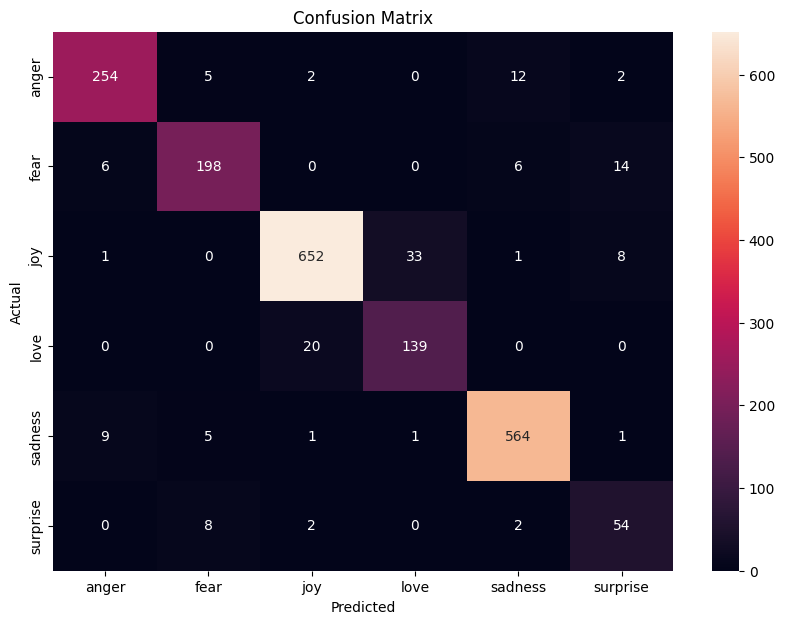

In [10]:
from sklearn.metrics import confusion_matrix
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train[0].apply(' '.join))

X_train_nn = tokenizer.texts_to_sequences(aug_train[0].apply(' '.join))
X_valid_nn = tokenizer.texts_to_sequences(df_val[0].apply(' '.join))
X_test_nn = tokenizer.texts_to_sequences(df_test[0].apply(' '.join))


maxlen = max(len(x) for x in X_train_nn)  
X_train_nn = pad_sequences(X_train_nn, maxlen=maxlen)
X_valid_nn = pad_sequences(X_valid_nn, maxlen=maxlen)
X_test_nn = pad_sequences(X_test_nn, maxlen=maxlen)


y_train_onehot = to_categorical(le.fit_transform(aug_train[1]))
y_valid_onehot = to_categorical(y_valid)
y_test_onehot = to_categorical(y_test)

embedding_dim = 100
embedding_matrix = create_glove_matrix('glove.6B.100d.txt',tokenizer.word_index, embedding_dim)

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, weights=[embedding_matrix], input_length=maxlen,trainable=True)) 
model.add(Bidirectional(GRU(units=128, dropout=0.5, recurrent_dropout=0,return_sequences=False ))) 
model.add(Dense(units=6, activation='softmax')) 


model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics='accuracy')


early_stop = EarlyStopping(monitor='val_loss', patience=5)


model.fit(X_train_nn, y_train_onehot, validation_data=(X_valid_nn, y_valid_onehot), epochs=10, callbacks=[], batch_size=32, verbose = 1) 


print('Training Accuracy:', model.evaluate(X_train_nn, y_train_onehot)[1])
print('Validation Accuracy:', model.evaluate(X_valid_nn, y_valid_onehot)[1])
print('Test Accuracy:', model.evaluate(X_test_nn, y_test_onehot)[1])


prediction_probs = model.predict(X_test_nn)
prediction_classes = np.argmax(prediction_probs, axis=1)
y_test_classes = np.argmax(y_test_onehot, axis=1)


print(classification_report(y_test_classes, prediction_classes))
print(le.classes_)



conf_mat = confusion_matrix(y_test_classes, prediction_classes)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Effect of dataset expansion
We re-trained our best performing Bi-directional GRU model on the expanded dataset and sadly found no significant difference between it and the model previously trained on the original dataset. This was unexpected as the expanded dataset is of good quality and increases the total amount of data by over 50%. To explain our inability to predict with over 94% accuracy we delved into the test set to determine which sentences our models are having trouble classifying. 

##### We will now analyse some sentences that we predict incorrectly, keep in mind that the sentences are tokenized.
##### Example 1
Sentence: ['feel', 'bit', 'stressed', 'even', 'though', 'thing', 'going', 'fun']
Predicted label: ['sadness']
Actual label: ['anger']

##### Example 2
Sentence: ['feel', 'like', 'paradise', 'kissing', 'sweet', 'lip', 'make', 'feel', 'like', 'dive', 'magical', 'world', 'love']
Predicted label: ['love']
Actual label: ['joy']

##### Example 3
Sentence: ['friend', 'dropped', 'frog', 'neck']
Predicted label: ['fear']
Actual label: ['anger']

##### Example 4
Sentence: ['feel', 'heart', 'tortured', 'done']
Predicted label: ['fear']
Actual label: ['anger']


I think we can all agree that enough information is lost in the process of tokenization and basic preprocessing that not even we as humans feeling the emotions can correctly classify all of these sentences, we therefore conclude it is pointless to chase the last percent of accuracy as we might already be very close to the limited. It's also important to note that these examples weren't hard to find, they were practically 4 examples out of the first 7-8 sentences we classified incorrectly.

#### Model Performance
It's worth to note that our best performing model is the Bi-directional GRU followed by a CNN and an LSTM, the differences in those 3 are, however, insignificant as they all reach close to the same accuracy of around 94%

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/7
500/500 [==============================] - 19s 32ms/step - loss: 1.3397 - accuracy: 0.5226 - val_loss: 0.8351 - val_accuracy: 0.7545
Epoch 2/7
500/500 [==============================] - 15s 31ms/step - loss: 0.6407 - accuracy: 0.8153 - val_loss: 0.4634 - val_accuracy: 0.8640
Epoch 3/7
500/500 [==============================] - 15s 31ms/step - loss: 0.3990 - accuracy: 0.8787 - val_loss: 0.3532 - val_accuracy: 0.8860
Epoch 4/7
500/500 [==============================] - 16s 32ms/step - loss: 0.3055 - accuracy: 0.8978 - val_loss: 0.3113 - val_accuracy: 0.8950
Epoch 5/7
500/500 [==============================] - 16s 32ms/step - loss: 0.2608 - accuracy: 0.9101 - val_loss: 0.2901 - val_accuracy: 0.8960
Epoch 6/7
500/500 [==============================] - 16s 33ms/step - loss: 0.2275 - accuracy: 0.9180 - val_loss: 0.2878 - val_accuracy: 0.8955
Epoch 7/7
500/500 [==============================] - 7s 13ms/step - loss: 0.1308 - accuracy: 0.9496
Training Accuracy: 0.9495624899864197
63/6

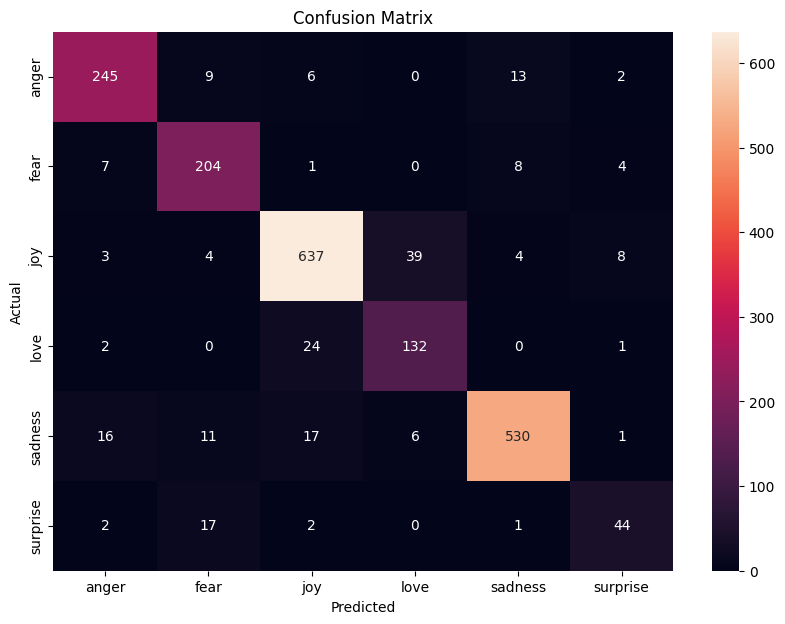

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import keras.optimizers as opt
from sklearn.metrics import confusion_matrix


tokenizer = BertTokenizer.from_pretrained('prajjwal1/bert-tiny')


train_sentences = [' '.join(words) for words in df_train[0]]
val_sentences = [' '.join(words) for words in df_val[0]]
test_sentences = [' '.join(words) for words in df_test[0]]


train_encodings = tokenizer(train_sentences, truncation=True, padding=True, max_length=64)
val_encodings = tokenizer(val_sentences, truncation=True, padding=True, max_length=64)
test_encodings = tokenizer(test_sentences, truncation=True, padding=True, max_length=64)
le = LabelEncoder()

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    le.fit_transform(df_train[1])
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    le.transform(df_val[1])
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    le.transform(df_test[1])
))

model = TFBertForSequenceClassification.from_pretrained('prajjwal1/bert-tiny', num_labels=6,from_pt=True)


optimizer = opt.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.fit(train_dataset.shuffle(1000).batch(32), epochs=7, validation_data=val_dataset.batch(32),verbose=1)


train_dataset = train_dataset.batch(32)
val_dataset = val_dataset.batch(32)
test_dataset = test_dataset.batch(32)

print('Training Accuracy:', model.evaluate(train_dataset)[1])
print('Validation Accuracy:', model.evaluate(val_dataset)[1])
print('Test Accuracy:', model.evaluate(test_dataset)[1])


prediction_probs = model.predict(test_dataset)
prediction_classes = np.argmax(prediction_probs.logits, axis=1)
y_test = le.transform(df_test[1])
print(classification_report(y_test, prediction_classes))
print(le.classes_)

conf_mat = confusion_matrix(y_test, prediction_classes)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

